# 1. Numpy 
Numpy is a powerful Python module that should be in the toolbelt of any AI/Deep learning practitioner. It provides functions and data strutctures that allow fast, efficient manipulation of mathematical structures like matrices and vectors. It represents these structures internally using Numpy arrays, which are like Python Lists, but highly optimised for calculations on large amounts of numerical data. Let's import this module now.

In [1]:
import numpy as np

### 1.1.1 Array creation
Numpy arrays can be created in a few different ways. Common ones are:
1. Instantiated using values from a normal Python list
2. Filled with sequential values upto a target number
3. Filled with a specific value
4. Filled with random values (various random distributions available) - see https://numpy.org/doc/stable/reference/random/index.html


In [2]:
#Array creation from python list
python_list = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
np_from_list = np.array(python_list)  
print(np_from_list)

[   2    4    8   16   32   64  128  256  512 1024]


In [3]:
#Array creation with sequential values 
seq_array = np.arange(20)
print(seq_array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [4]:
#Array creation with random values 
random_array = np.random.rand(10)  # returns an array filled with 10 random floats between 0 and 1
print(random_array)

[0.85359924 0.21550455 0.61883209 0.1461737  0.56325449 0.31472741
 0.82298374 0.52887853 0.29088479 0.56808861]


In [5]:
#Array filled with the same specific value
filled_array = np.full(10, 256)  # returns an array filled with 10 instances of 256
print(filled_array)

[256 256 256 256 256 256 256 256 256 256]


### 1.1.2 Reshaping arrays

One of the many things that set Numpy arrays apart from Python lists is their `reshape` method. This allows you to define the number of dimensions that the structure represented by the array has. For example, the array `np_from_list` that we have just defined is just a flat list of numbers at the moment. `reshape` helps us represent it as a 2D data structure (a matrix). Keep in mind that the shape that you put into this method must agree with the number of elements in the array. In our example, the array has 10 elements, so acceptable shapes include:
* 5, 2
* 2, 5
* 1, 10
* 10, 1

In [6]:
matrix_5_2 = np_from_list.reshape(5,2)
print(matrix_5_2)
print(f"matrix_5_2 shape: {matrix_5_2.shape}")

[[   2    4]
 [   8   16]
 [  32   64]
 [ 128  256]
 [ 512 1024]]
matrix_5_2 shape: (5, 2)


In [7]:
matrix_2_10 = seq_array.reshape(2,10)
print(matrix_2_10)
print(f"matrix_2_10 shape: {matrix_2_10.shape}")

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]]
matrix_2_10 shape: (2, 10)


### 1.1.3 Exercises

In [8]:
# Create a Numpy array A that contains the integers from 0 - 31 (32 elements long)
A = ...
print(A)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]


In [9]:
# Create a Numpy array B that contains 12 random numbers between 0 and 1
B = ...
print(B)

[0.94660477 0.6491107  0.68032809 0.15248778 0.80715277 0.4714136
 0.64061076 0.89914903 0.1444249  0.56340859 0.37597514 0.61321826]


In [10]:
# Turn A into a 2d matrix of shape (8, 4) - 8 rows, 4 columns
A = ...
print(A)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]


In [11]:
# Turn B into a 2d matrix of shape (4, 3)
B = ...
print(B)

[[0.94660477 0.6491107  0.68032809]
 [0.15248778 0.80715277 0.4714136 ]
 [0.64061076 0.89914903 0.1444249 ]
 [0.56340859 0.37597514 0.61321826]]


## 1.2 Array operations
Once you have created an array, there are various operations you may want to perform on them. We'll go through some of the most common ones in the next few cells.

### 1.2.1 Binary operators
Similar to normal counting numbers, Numpy arrays can be used as arguments to binary arithmetic operators like `*` (multiplication), `+` (addition), `-`(subtraction) and `/`(division). However, these can only be applied to arrays under certain conditions:
1. The arrays have the same shape, OR
2. The operation is between an array and a scalar, OR
3. The operations is between 2 arrays of different shapes that can be "broadcast" together - more on this later

These operations are applied **element-wise** meaning each element in the array is combined with its corresponding element at the same position in the other array

In [12]:
# Addition with a scalar
arr = np.random.rand(32).reshape(A.shape)
scalar_add_array = 11 + arr 
print(scalar_add_array)

[[11.52876623 11.18639677 11.88731666 11.39916654]
 [11.75988146 11.24457888 11.18330672 11.93893939]
 [11.75996565 11.9620578  11.77164364 11.09362489]
 [11.77421122 11.11781541 11.56596966 11.93185942]
 [11.20366123 11.49667201 11.99896836 11.4105833 ]
 [11.64121101 11.34538066 11.83726166 11.38794767]
 [11.35516755 11.9550781  11.89987947 11.08088978]
 [11.75609752 11.37462288 11.08040079 11.42720056]]


In [13]:
# Subtraction with another array of same shape
sub_array = arr - A 
print(sub_array)

[[  0.52876623  -0.81360323  -1.11268334  -2.60083346]
 [ -3.24011854  -4.75542112  -5.81669328  -6.06106061]
 [ -7.24003435  -8.0379422   -9.22835636 -10.90637511]
 [-11.22578878 -12.88218459 -13.43403034 -14.06814058]
 [-15.79633877 -16.50332799 -17.00103164 -18.5894167 ]
 [-19.35878899 -20.65461934 -21.16273834 -22.61205233]
 [-23.64483245 -24.0449219  -25.10012053 -26.91911022]
 [-27.24390248 -28.62537712 -29.91959921 -30.57279944]]


In [14]:
# Multiplication with another array of same shape
mul_array = arr * A 
print(mul_array)

[[ 0.          0.18639677  1.77463333  1.19749962]
 [ 3.03952586  1.22289441  1.09984032  6.57257574]
 [ 6.07972521  8.65852024  7.71643645  1.02987384]
 [ 9.29053467  1.53160039  7.92357521 13.97789126]
 [ 3.2585797   8.44342419 17.98143053  7.8010827 ]
 [12.82422013  7.25299391 18.41975657  8.92279641]
 [ 8.52402113 23.87695252 23.39686614  2.18402394]
 [21.17073058 10.86406352  2.41202385 13.24321732]]


In [15]:
# Division by a scalar
div_array = 11 / arr 
print(div_array)

[[ 20.80314376  59.01389752  12.39692709  27.55742013]
 [ 14.47594199  44.97526483  60.00871093  11.71534616]
 [ 14.4743384   11.4338244   14.2552849  117.49011914]
 [ 14.20800898  93.36639053  19.43567088  11.80435567]
 [ 54.01126139  22.1474127   11.01135973  26.79115299]
 [ 17.15503928  31.84891685  13.13806722  28.35433965]
 [ 30.97129818  11.51738271  12.22385931 135.9875206 ]
 [ 14.54838787  29.36286219 136.8145677   25.74903   ]]


### 1.2.2 Broadcasting
As long as an array's dimensions are compatible with their counterparts in the other array, they can be "broadcasted" together. This means that numpy will 'strectch' the smaller dimension along its axis so that element-wise operations can be applied between them. In general, 2 arrays can be broadcast together if each dimension in one array is compatible with its counterpart in the other array. Dimensions are compatible if they are equal or one of them is equal to 1. The dimension of size 1 is expanded to fit the size of its counterpart [https://numpy.org/doc/stable/user/basics.broadcasting.html]

In [16]:
array_4_1 = np.arange(4).reshape(4,1)
print(array_4_1, array_4_1.shape)  

# array_4_1 has shape (4, 1) so it can be broadcast to shape (4, 3) along B's horizontal axis
# it's as if array_4_1 has been copied along the horizontal axis so that it can be added to B
broadcasted = array_4_1 + B
print(broadcasted, broadcasted.shape)

[[0]
 [1]
 [2]
 [3]] (4, 1)
[[0.94660477 0.6491107  0.68032809]
 [1.15248778 1.80715277 1.4714136 ]
 [2.64061076 2.89914903 2.1444249 ]
 [3.56340859 3.37597514 3.61321826]] (4, 3)


In [17]:
# Similarly, we can also broadcast an array of shape (1, 2) along B's vertical axis
array_1_3 = np.arange(3).reshape(1,3)
print(array_1_3, array_1_3.shape)

broadcasted = array_1_3 * B
print(broadcasted, broadcasted.shape)




[[0 1 2]] (1, 3)
[[0.         0.6491107  1.36065619]
 [0.         0.80715277 0.9428272 ]
 [0.         0.89914903 0.2888498 ]
 [0.         0.37597514 1.22643653]] (4, 3)


### 1.2.3 Array products
Contrary to the `*` operator, which performs element-wise multiplication between the arrays, `np.matmul` is the matrix product of the arrays.

In [18]:
matmul_matrix = np.matmul(A, B)
print(f"A shape: {A.shape}, B shape: {B.shape}, AB shape: {matmul_matrix.shape}")

A shape: (8, 4), B shape: (4, 3), AB shape: (8, 3)


### 1.2.4 Exercises

In [19]:
# Divide your array B by the number 2.5. Store the result in a variable C
C = ...
print(C)

[[0.37864191 0.25964428 0.27213124]
 [0.06099511 0.32286111 0.18856544]
 [0.2562443  0.35965961 0.05776996]
 [0.22536344 0.15039005 0.24528731]]


In [20]:
# Create a new array filled with -1. The array must have the same shape as B. Store the result in a variable D
D = ...
print(D)

[[-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]
 [-1 -1 -1]]


In [21]:
# Multiply this new array ELEMENT-WISE with B and store the result in a variable called E.
E = ...
print(E)

[[-0.37864191 -0.25964428 -0.27213124]
 [-0.06099511 -0.32286111 -0.18856544]
 [-0.2562443  -0.35965961 -0.05776996]
 [-0.22536344 -0.15039005 -0.24528731]]


In [22]:
# Consider the intermediate array below. 
intermediate_arr = np.arange(4).reshape(2, 2)
print(intermediate_arr)

[[0 1]
 [2 3]]


In [23]:
# Try and multiply it with D element-wise. What happens? What could 
# you do to make this multiplication work? (hint: try and make
# the intermediate array broadcastable to C)
intermediate_arr = ...
F = ...
print(F)

[[-0.         -0.         -0.        ]
 [-0.06099511 -0.32286111 -0.18856544]
 [-0.51248861 -0.71931923 -0.11553992]
 [-0.67609031 -0.45117016 -0.73586192]]


## 1.3 Functions
Another useful thing we might want to do with an array is to apply a function to each element. Generally speaking, it is best to use the built-in Numpy functions to work on numpy arrays instead of defining your own. This is because Numpy functions are highly optimised for speed, which is important when working with large amounts of data. Chances are, whatever kind of mathematical operation you want to perform on a Numpy array is already built in. See below for a full list:  
https://numpy.org/doc/stable/reference/routines.math.html  

### 1.3.1 Element-wise functions
Common uses are applying trig functions to an array of values:

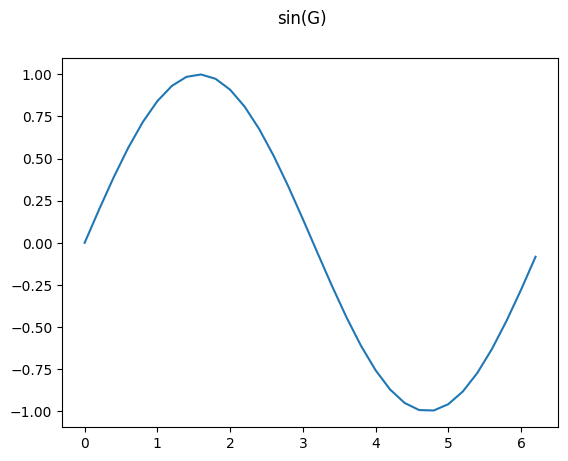

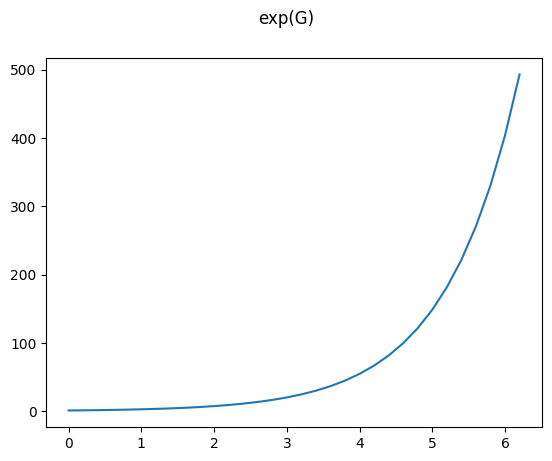

In [24]:
import matplotlib.pyplot as plt

def simple_plot(x, y, label):
    plt.plot(x, y)
    plt.suptitle(label)
    plt.show()

    

# Element-wise functions: 
G = np.arange(0, 2*np.pi, 0.2)
H = np.sin(G)
simple_plot(G, H, "sin(G)")

H_1 = np.exp(G)
simple_plot(G, H_1, "exp(G)")

### 1.3.2 Reduce functions
These are applied along the selected axis, consume all the elements and reduce the axis down to 1 element. If no axis is specified, the function is applied to the whole array, and reduces it to a scalar

In [25]:
print(A)

I = A.max()
print(f"Maximum value in A: \n{I}")

I_2 = np.mean(A, axis=0, keepdims=True)  # keepdims is needed to preserve the original shape of the axis
print(f"Average of each column in A: \n{I_2}")

I_3 = A.min(axis=1, keepdims=True) 
print(f"Minimum value in each row in A: \n{I_3}")


[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]
Maximum value in A: 
31
Average of each column in A: 
[[14. 15. 16. 17.]]
Minimum value in each row in A: 
[[ 0]
 [ 4]
 [ 8]
 [12]
 [16]
 [20]
 [24]
 [28]]


### 1.3.3 Exercises


In [41]:
# Have a look at the trigonometric functions listed in the official numpy documentation: https://numpy.org/doc/stable/reference/routines.math.html
# Pick any element-wise function that takes 1 argument and apply it to the following array. store the result in a variable called Ys
Xs = np.arange(-2*np.pi, 2*np.pi, 0.1)
Ys = ...
print(Ys)

Ellipsis


In [42]:
# Call our previously-defined simple plot function and display your result! Give the plot a suitable title
...

In [28]:
# Use a suitable Numpy reduce function to find the maximum value of your function's result
max_val = ...
print(max_val)

1.411308415679924


## 1.4 numpy.where
This allows us to conditionally modify the elements of an array, which can be useful for tasks like thresholding or masking.

In [29]:
big_image = np.arange(10*10).reshape(10,10)
big_image_thresh = np.where(big_image<50, 0, big_image)
big_image_thresh


array([[ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

### 1.4.1 Exercises


In [30]:
# Create a Numpy array of shape (10, 5) and fill it with random values between 0 and 1. Store it in a variable called J
J = ...
print(J)

[[0.25185956 0.2677892  0.68743166 0.52681316 0.51481031]
 [0.34976166 0.04098437 0.72461327 0.5645061  0.7903563 ]
 [0.39770905 0.09047202 0.57969886 0.91383938 0.69908217]
 [0.46450976 0.4436814  0.28603405 0.55631058 0.79787106]
 [0.86939553 0.20865305 0.11863935 0.01223757 0.92909226]
 [0.74573087 0.58775662 0.95253112 0.80656906 0.09569688]
 [0.03489794 0.47141474 0.11968137 0.67618795 0.3615895 ]
 [0.99184206 0.58720457 0.24582177 0.82218658 0.82805897]
 [0.0714896  0.60577353 0.0721193  0.13171833 0.16277309]
 [0.30561059 0.40487785 0.35080283 0.63239617 0.38455003]]


In [31]:
# Conditionally modify the array such that numbers below 0.5 are replaced with 0 and numbers above or equal to 0.5 are replaced with 1. Store the result in a variable called K
K = ...
print(K)

[[0 0 1 1 1]
 [0 0 1 1 1]
 [0 0 1 1 1]
 [0 0 0 1 1]
 [1 0 0 0 1]
 [1 1 1 1 0]
 [0 0 0 1 0]
 [1 1 0 1 1]
 [0 1 0 0 0]
 [0 0 0 1 0]]


## 1.5 Practical example

Putting everything together for a practical example, and visulalise the output of some Numpy operations

In [32]:
# Defining some helper functions
def plot_point(point):
    plt.rcParams["figure.figsize"] = [3.50, 3.50]
    plt.rcParams["figure.autolayout"] = True
    x = point[0]
    y = point[1]
    
    lims = 3
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.xlim(-lims, lims)
    plt.ylim(-lims, lims)
    plt.grid()
    ax.plot(x, y, marker="o", markersize=7, markeredgecolor="black", markerfacecolor="red")
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    plt.show()



# This function returns an np array that describes a 2d rotation 
# matrix [https://www1.udel.edu/biology/rosewc/kaap686/notes/matrices_rotations.pdf]. 
# These kinds of structures are often used in computer graphics to rotate and translate points in space
def get_rot_clockwise_matrix(angle):
    return np.array([
        [ np.cos(angle), np.sin(angle)],
        [-np.sin(angle), np.cos(angle)]
    ])

In [33]:
# Create a random 2-element array containing values from 0 - 1. Assign this array to a variable `p`
p = ...
print(p)

[0.68704007 0.98188057]


In [34]:
# Using scalar multiplication to double the value of the elements in `p`. Assign the result back to `p`
p = ...
print(p)

[1.37408013 1.96376113]


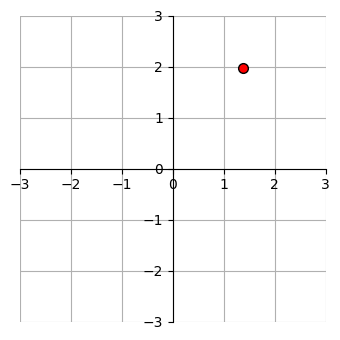

In [35]:
# Reshape `p` to be (2, 1), assign the result to `p` and plot the point.
p = ...
plot_point(p)

In [36]:
# We will now rotate this point about the origin of the plot using the funciton we defined above
# This cell is just some setup for the rest of the exercise, just run it once
min_angle = np.pi/2 # 90 degrees
max_angle = np.pi   # 180 degrees
angle = np.random.uniform(min_angle, max_angle) # get a random angle between 90 and 180 degrees
print(np.degrees(angle)) # print the angle in degrees so we can check the rotation is correct!

173.24199908215348


In [37]:
# Call the previously-defined roation matrix function with the angle. Assign the result to 
# a variable called `rot90`
rot90 = ...
print(rot90)

[[-0.99305203  0.11767607]
 [-0.11767607 -0.99305203]]


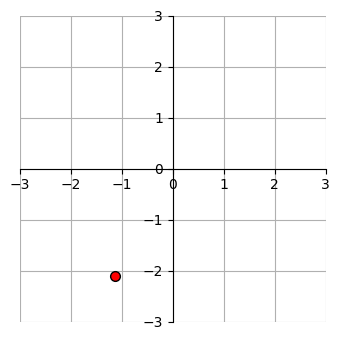

In [38]:
# Apply a matrix multiplication operation between rot90 and p. assign the result back to p and plot it.
p = ...
plot_point(p)

In [39]:
# Create an array named `translation` which has the same shape as `p`, and fill it with 2's
translation = ...
print(translation)

[[2]
 [2]]


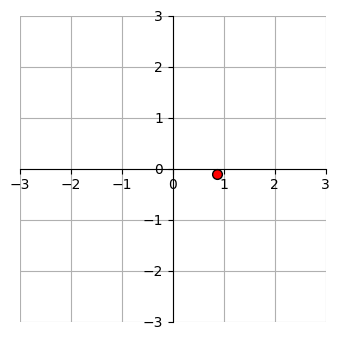

In [40]:
# Add this result to p and plot it!
p = ...
plot_point(p)